In [17]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
root_path = 'gdrive/My Drive/Colab Notebooks/CS230_PROJECT'

# GOOGLE DRIVE - COLAB
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive"


Mounted at /content/gdrive
Mounted at /content/drive


In [0]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/CS230_PROJECT/MSFT_Premium.csv')

In [19]:
df.head

<bound method NDFrame.head of       Unnamed: 0 ticker_x        date  ...  taxliabilities   tbvps  workingcapital
0             77     MSFT  2014-04-24  ...    3.012000e+09  16.715    7.510300e+10
1             78     MSFT  2014-04-25  ...    3.012000e+09  16.715    7.510300e+10
2             79     MSFT  2014-04-28  ...    3.012000e+09  16.715    7.510300e+10
3             80     MSFT  2014-04-29  ...    3.012000e+09  16.715    7.510300e+10
4             81     MSFT  2014-04-30  ...    3.012000e+09  16.715    7.510300e+10
...          ...      ...         ...  ...             ...     ...             ...
1396        1473     MSFT  2019-11-07  ...    3.213100e+10  30.041    1.077780e+11
1397        1474     MSFT  2019-11-08  ...    3.213100e+10  30.041    1.077780e+11
1398        1475     MSFT  2019-11-11  ...    3.213100e+10  30.041    1.077780e+11
1399        1476     MSFT  2019-11-12  ...    3.213100e+10  30.041    1.077780e+11
1400        1477     MSFT  2019-11-13  ...    3.213100e+1

In [20]:
features_considered = ['open','high','low','close','volume']
# 5 features
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x']
# 13 features lists - to explore -
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','deposits','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','fxusd','gp','grossmargin','intangibles','intexp','invcap','invcapavg','inventory','investments','investmentsc','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netincdis','netincnci','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','prefdivis','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp','sgna','sharefactor','sharesbas','shareswa','shareswadil','sps','tangibles','taxassets','taxexp','taxliabilities','tbvps','workingcapital']
# 41 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt']
# 54 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin']
# 77 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin']
# 98 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp']
# 109 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp','sgna','sharesbas','shareswa','shareswadil','sps','tangibles','taxassets','taxexp','taxliabilities','tbvps','workingcapital']
features = df[features_considered]
features.index = df['date']
features.head()

,open,high,low,close,volume
date,,,,,
2014-04-24,39.74,39.97,39.30,39.86,42381600.0
2014-04-25,40.29,40.68,39.75,39.91,56876800.0
2014-04-28,40.14,41.29,40.09,40.87,50610200.0
2014-04-29,41.10,41.19,40.39,40.51,29636200.0
2014-04-30,40.40,40.50,40.17,40.40,35458700.0


In [21]:
TRAIN_SPLIT=np.int(len(df)*0.8) 
#features[:,4] = np.log(features[:,4])
dataset = features.values # Convert dataset in a numpy array
dataset[:,4] = np.log(dataset[:,4]) # Log apply to the volumen 
#print(dataset)
#data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_mean = dataset.mean(axis=0)
print(data_mean[3])
#print(data_mean)
#data_std = dataset[:TRAIN_SPLIT].std(axis=0)
data_std = dataset.std(axis=0)
#print(data_std)
dataset = (dataset-data_mean)/data_std
#dataset[:,4] = np.log(dataset[4,:])

74.84376730906496


In [22]:
for i in range(0,4):
    print(max(dataset[:,i]),min(dataset[:,i]))
    #print(min(dataset[:,i]))


2.3502934358380214 -1.1639309718540651
2.341302143966975 -1.1712688801012396
2.3814428138940174 -1.1776548459168157
2.371435469905334 -1.1710129241225309


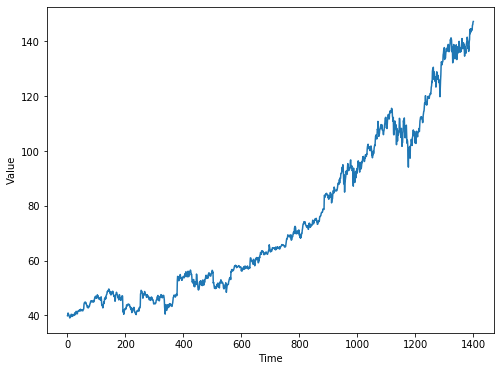

In [23]:
def plot_series(time, series, format="-", start=0, end=None,set=df):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

time=np.arange(len(dataset),dtype="float32")
series_original=(dataset*data_std)+data_mean # To plot the Original Values
plot_series(time, series_original[:,3])

In [0]:
#df = pd.read_csv('drive/My Drive/Colab Notebooks/CS230_PROJECT/ARIMA/SFT_Premium.csv')

       0
0  39.86
1  39.91
2  40.87
3  40.51
4  40.40


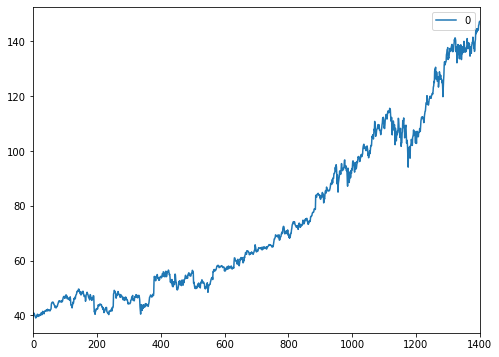

In [24]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

#series = read_csv('drive/My Drive/Colab Notebooks/ARIMA/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series=pd.DataFrame(series_original[:,3])
print(series.head())
series.plot()
pyplot.show()

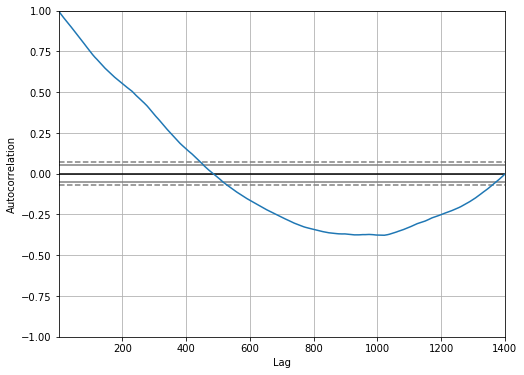

In [25]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')

#series = read_csv('drive/My Drive/Colab Notebooks/ARIMA/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

predicted=85.599582, expected=85.500000
predicted=85.476297, expected=85.510000
predicted=85.591580, expected=85.400000
predicted=85.481992, expected=85.710000
predicted=85.775264, expected=85.720000
predicted=85.768088, expected=85.540000
predicted=85.595986, expected=85.950000
predicted=86.003255, expected=86.350000
predicted=86.376324, expected=87.110000
predicted=87.144943, expected=88.190000
predicted=88.217358, expected=88.280000
predicted=88.287781, expected=88.220000
predicted=88.246323, expected=87.820000
predicted=87.836944, expected=88.080000
predicted=88.094837, expected=89.600000
predicted=89.631271, expected=88.350000
predicted=88.396818, expected=90.140000
predicted=90.192717, expected=90.100000
predicted=90.100735, expected=90.000000
predicted=90.011801, expected=91.610000
predicted=91.650075, expected=91.900000
predicted=91.859746, expected=91.820000
predicted=91.883799, expected=92.330000
predicted=92.360090, expected=94.060000
predicted=94.016260, expected=93.920000


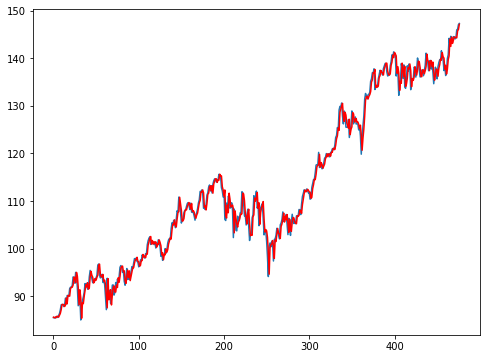

Up_real:269
Down_real:208
Up Real Up Prediction:155
Up Real Down Prediction:114
Down Real Up Prediction:107
Down Real Down Prediction:101


In [35]:
# Tests UP and Down Validation Test
up_real=0
down_real=0
up_r_up_pred=0
up_r_down_pred=0
d_r_up_pred=0
d_r_down_pred=0

yhat_anterior=100
obs_anterior=100

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	if obs>obs_anterior:  # Up real
		up_real=up_real+1
		if yhat > obs_anterior: # Up Real Prediction Up
			up_r_up_pred=up_r_up_pred+1  
		else:
			up_r_down_pred=up_r_down_pred+1 # Up real Prediction down
	else: # Down Real
		down_real=down_real+1
		if yhat < obs_anterior: # Down real prediction down
			d_r_down_pred=d_r_down_pred+1 
		else:
			d_r_up_pred=d_r_up_pred+1 # Down Real prediction up

	yhat_anterior = yhat
	obs_anterior = obs
	print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
error_MAE = mean_absolute_error(test, predictions)
print('Test MSE: %.3f' % error)
print('Test MAE: %.3f' % error_MAE)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

print("Up_real:"+str(up_real))
print("Down_real:"+str(down_real))
print("Up Real Up Prediction:"+str(up_r_up_pred))
print("Up Real Down Prediction:"+str(up_r_down_pred))
print("Down Real Up Prediction:" + str(d_r_up_pred))
print("Down Real Down Prediction:" + str(d_r_down_pred))

Normalized Confusion Matrix
[[0.47 0.53]
 [0.41 0.59]]


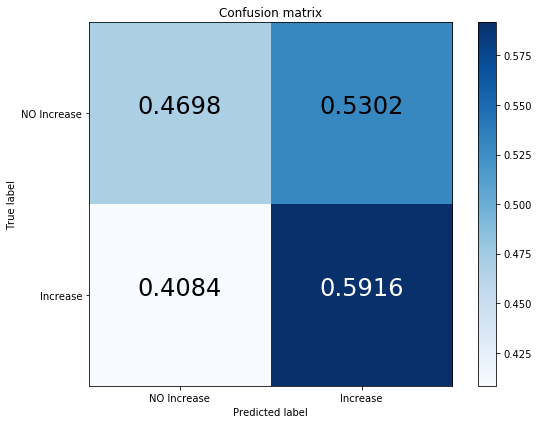

In [34]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = ['NO Increase', 'Increase']


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylim([1.5, -.5])

    fmt = '.4f' if normalize else 'd'

    thresh = cm.max() - 0.05
    #plt.text(j, i, format(cm[i, j], fmt),

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #print (cm[i, j])
        plt.text(j, i, format(cm[i, j],fmt),
                 horizontalalignment="center",
                 fontsize=24, 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# Compute confusion matrix

train_cnf_matrix = np.array([[101, 107], [114, 155]]).T
eval_cnf_matrix = np.array([[27, 25], [3, 15]]).T
np.set_printoptions(precision=2)


# Set model for saving purposes

model = 'ARIMA MSFT'


# Plot normalized confusion matrix

plt.figure()

plot_confusion_matrix(train_cnf_matrix, classes=class_names, normalize=True)

plt.tight_layout()
plt.show()

#plt.savefig('gdrive/My Drive/Colab Notebooks/CS230_PROJECT/confusion_matrices/%s_train.png' % model)



#plt.figure()

#plot_confusion_matrix(eval_cnf_matrix, classes=class_names, normalize=True)

#plt.savefig('confusion_matrixes/%s_val.png' % model)